In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(25.077612209530045, -8.502680379882804),
 (62.33743947910665, 152.32382745943448),
 (-60.17077644294598, -72.76609029847899),
 (15.889183843322726, -107.19653096381339),
 (25.480750408161725, 101.34380751595626),
 (75.89539614194095, -151.67515554622977),
 (-19.347702267844525, -91.02809505525737),
 (-89.49949655051368, -23.22923068086692),
 (-22.346828139839815, 176.19839160245965),
 (-86.56984333064813, -156.6385474140556),
 (68.89454896830489, -120.41758231456384),
 (-75.2524941251027, 18.298797574793184),
 (-72.75167705070581, 114.51896816376473),
 (-80.23029651008989, -59.37054195946939),
 (-31.464656089682578, -133.958571467639),
 (71.71406096398798, -13.197345624508216),
 (29.051963856514035, 58.48146782233317),
 (81.81281069375689, -127.85879641674693),
 (-26.432530114567683, -96.99178692113445),
 (-32.33908142317063, -148.05523757077378),
 (-78.39372145982226, -166.610157330674),
 (-40.697490197369724, 54.25575912430489),
 (-51.61259399347054, 71.50408184103944),
 (-25.87916

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
cities

['tiznit',
 'seymchan',
 'ushuaia',
 'san patricio',
 'panzhihua',
 'barrow',
 'hualmay',
 'isangel',
 'mataura',
 'norman wells',
 'bredasdorp',
 'albany',
 'rikitea',
 'husavik',
 'bam',
 'tuktoyaktuk',
 'pisco',
 'avarua',
 'taolanaro',
 'souillac',
 'koster',
 'aklavik',
 'esna',
 'tasiilaq',
 'kamen-rybolov',
 'dembi dolo',
 'patacamaya',
 'castro',
 'hermanus',
 'saldanha',
 'hilo',
 'clyde river',
 'atuona',
 'khatanga',
 'key largo',
 'siniscola',
 'new norfolk',
 'finnsnes',
 'longyearbyen',
 'saskylakh',
 'sibolga',
 'attawapiskat',
 'pangnirtung',
 'manacapuru',
 'esperance',
 'tibati',
 'harnosand',
 'cape town',
 'sept-iles',
 'alofi',
 'kodiak',
 'labuhan',
 'port alfred',
 'kununurra',
 'berbera',
 'karratha',
 'namatanai',
 'ondo',
 'tual',
 'lebu',
 'bluff',
 'cidreira',
 'geraldton',
 'port moresby',
 'bereda',
 'kuryk',
 'stabat',
 'quatre cocos',
 'abu dhabi',
 'pemba',
 'fortuna',
 'butaritari',
 'saint-pierre',
 'korla',
 'umzimvubu',
 'grindavik',
 'ulaanbaatar',

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

a37b54c36e449e99b1f4d91efeb53fb9


In [9]:
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
 #   if (i % 50 == 0 and i >= 50):
  #      set_count += 1
   #     record_count = 1
    #    time.sleep(60)

    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiznit
Processing Record 2 of Set 1 | seymchan
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | panzhihua
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | hualmay
Processing Record 8 of Set 1 | isangel
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | norman wells
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | husavik
Processing Record 15 of Set 1 | bam
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | pisco
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | koster
Processing Record 22 of Set 1 | aklavik
Processing Record 23 of Set 1

Processing Record 39 of Set 4 | upernavik
Processing Record 40 of Set 4 | harper
Processing Record 41 of Set 4 | kahului
Processing Record 42 of Set 4 | mahebourg
Processing Record 43 of Set 4 | kasongo
Processing Record 44 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 4 | ksenyevka
City not found. Skipping...
Processing Record 46 of Set 4 | chulym
Processing Record 47 of Set 4 | samusu
City not found. Skipping...
Processing Record 48 of Set 4 | lakes entrance
Processing Record 49 of Set 4 | palmer
Processing Record 50 of Set 4 | bayonet point
Processing Record 1 of Set 5 | san antonio
Processing Record 2 of Set 5 | nouadhibou
Processing Record 3 of Set 5 | coihaique
Processing Record 4 of Set 5 | tairua
Processing Record 5 of Set 5 | cachoeiras de macacu
Processing Record 6 of Set 5 | satitoa
City not found. Skipping...
Processing Record 7 of Set 5 | kieta
Processing Record 8 of Set 5 | dipkarpaz
City not found. Skipping...
Processing Record 9 of Set 5

Processing Record 24 of Set 8 | altay
Processing Record 25 of Set 8 | hirosaki
Processing Record 26 of Set 8 | viedma
Processing Record 27 of Set 8 | dar es salaam
Processing Record 28 of Set 8 | wenling
Processing Record 29 of Set 8 | acari
Processing Record 30 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 31 of Set 8 | zhezkazgan
Processing Record 32 of Set 8 | berlevag
Processing Record 33 of Set 8 | sao joao da barra
Processing Record 34 of Set 8 | east london
Processing Record 35 of Set 8 | xiongshi
City not found. Skipping...
Processing Record 36 of Set 8 | port augusta
Processing Record 37 of Set 8 | ijaki
City not found. Skipping...
Processing Record 38 of Set 8 | lufilufi
Processing Record 39 of Set 8 | vicosa
Processing Record 40 of Set 8 | hami
Processing Record 41 of Set 8 | sao miguel do tapuio
Processing Record 42 of Set 8 | wilmington
Processing Record 43 of Set 8 | sao filipe
Processing Record 44 of Set 8 | chulman
Processing Record 45 of Set 8 | 

Processing Record 17 of Set 12 | kisangani
Processing Record 18 of Set 12 | shiyan
Processing Record 19 of Set 12 | antsohihy
Processing Record 20 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 21 of Set 12 | margate
Processing Record 22 of Set 12 | moussoro
Processing Record 23 of Set 12 | gao
Processing Record 24 of Set 12 | obluche
City not found. Skipping...
Processing Record 25 of Set 12 | pihuamo
Processing Record 26 of Set 12 | zabaykalsk
Processing Record 27 of Set 12 | sangolqui
Processing Record 28 of Set 12 | hofn
Processing Record 29 of Set 12 | vao
Processing Record 30 of Set 12 | andevoranto
City not found. Skipping...
Processing Record 31 of Set 12 | lithakia
Processing Record 32 of Set 12 | praya
Processing Record 33 of Set 12 | karabulak
Processing Record 34 of Set 12 | nhulunbuy
Processing Record 35 of Set 12 | laguna
Processing Record 36 of Set 12 | manakara
Processing Record 37 of Set 12 | tamandare
Processing Record 38 of Set 12 | outjo
Proce

In [33]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiznit,29.5833,-9.5000,74.97,23,45,3.67,MA,2022-04-16 23:49:35
1,Seymchan,62.8833,152.4333,17.40,82,90,4.00,RU,2022-04-16 23:49:35
2,Ushuaia,-54.8000,-68.3000,38.86,81,0,6.91,AR,2022-04-16 23:42:52
3,San Patricio,28.0170,-97.5169,87.89,70,94,13.44,US,2022-04-16 23:47:25
4,Panzhihua,26.5851,101.7128,68.04,52,81,1.92,CN,2022-04-16 23:49:36
5,Barrow,71.2906,-156.7887,6.82,78,0,19.57,US,2022-04-16 23:47:13
6,Hualmay,-11.0964,-77.6139,67.06,83,93,10.71,PE,2022-04-16 23:49:36
7,Isangel,-19.5500,169.2667,84.51,69,13,6.15,VU,2022-04-16 23:48:19
8,Mataura,-46.1927,168.8643,53.47,54,70,5.01,NZ,2022-04-16 23:46:21
9,Norman Wells,65.2820,-126.8329,17.64,35,20,3.44,CA,2022-04-16 23:45:57


In [34]:
city_url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a37b54c36e449e99b1f4d91efeb53fb9&q=thohoyandou'

In [35]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiznit,MA,2022-04-16 23:49:35,29.5833,-9.5000,74.97,23,45,3.67
1,Seymchan,RU,2022-04-16 23:49:35,62.8833,152.4333,17.40,82,90,4.00
2,Ushuaia,AR,2022-04-16 23:42:52,-54.8000,-68.3000,38.86,81,0,6.91
3,San Patricio,US,2022-04-16 23:47:25,28.0170,-97.5169,87.89,70,94,13.44
4,Panzhihua,CN,2022-04-16 23:49:36,26.5851,101.7128,68.04,52,81,1.92
5,Barrow,US,2022-04-16 23:47:13,71.2906,-156.7887,6.82,78,0,19.57
6,Hualmay,PE,2022-04-16 23:49:36,-11.0964,-77.6139,67.06,83,93,10.71
7,Isangel,VU,2022-04-16 23:48:19,-19.5500,169.2667,84.51,69,13,6.15
8,Mataura,NZ,2022-04-16 23:46:21,-46.1927,168.8643,53.47,54,70,5.01
9,Norman Wells,CA,2022-04-16 23:45:57,65.2820,-126.8329,17.64,35,20,3.44


In [58]:
# Create the output file (CSV).
output_data_file = "Analysis/weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

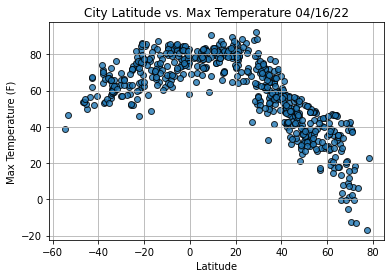

In [40]:
# Import time module
import time
import matplotlib.pyplot as plt
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Analysis/weather_data/Fig1.png")

# Show plot.
plt.show()

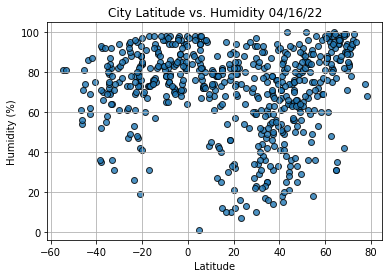

In [41]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Analysis/weather_data/Fig2.png")
# Show plot.
plt.show()

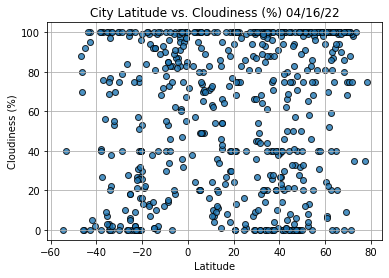

In [42]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Analysis/weather_data/Fig3.png")
# Show plot.
plt.show()

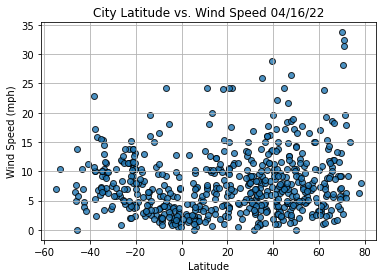

In [43]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Analysis/weather_data/Fig4.png")
# Show plot.
plt.show()

In [44]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is: {r_value:.3f}")

In [45]:
index13 = city_data_df.loc[13]
index13

City                      Husavik
Country                        IS
Date          2022-04-16 23:49:37
Lat                       66.0449
Lng                      -17.3389
Max Temp                    42.31
Humidity                       86
Cloudiness                    100
Wind Speed                  11.95
Name: 13, dtype: object

In [46]:
city_data_df['Lat'] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
581     True
582    False
583     True
584     True
585    False
Name: Lat, Length: 586, dtype: bool

In [47]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiznit,MA,2022-04-16 23:49:35,29.5833,-9.5000,74.97,23,45,3.67
1,Seymchan,RU,2022-04-16 23:49:35,62.8833,152.4333,17.40,82,90,4.00
3,San Patricio,US,2022-04-16 23:47:25,28.0170,-97.5169,87.89,70,94,13.44
4,Panzhihua,CN,2022-04-16 23:49:36,26.5851,101.7128,68.04,52,81,1.92
5,Barrow,US,2022-04-16 23:47:13,71.2906,-156.7887,6.82,78,0,19.57


In [48]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

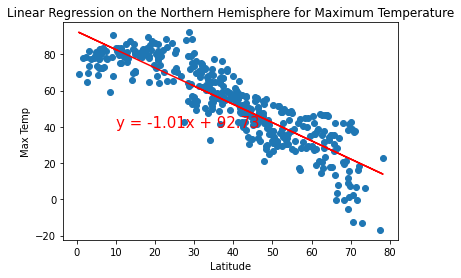

The r-value is: -0.878


In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

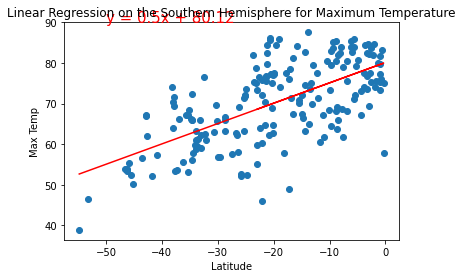

The r-value is: 0.647


In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

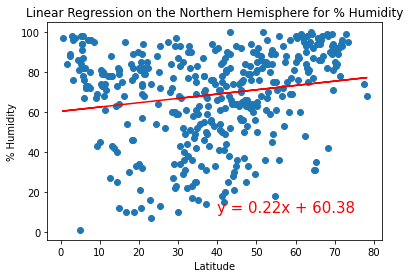

The r-value is: 0.181


In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

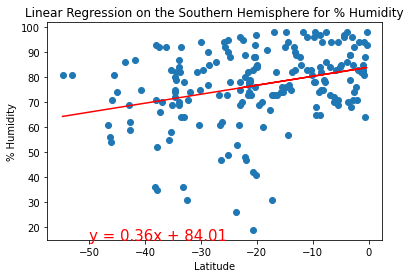

The r-value is: 0.307


In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

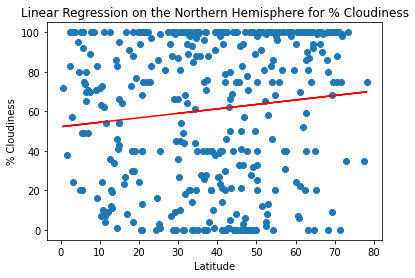

The r-value is: 0.117


In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,15))

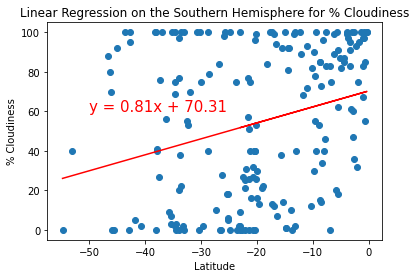

The r-value is: 0.277


In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

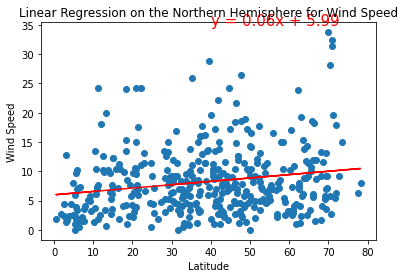

The r-value is: 0.191


In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

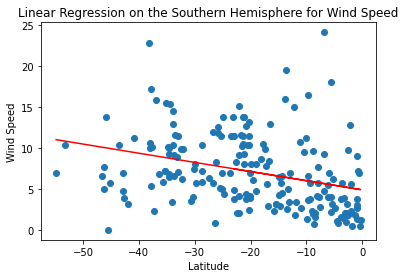

The r-value is: -0.324


In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))